# Importing Dependencies

In [2]:
#Importing libraries
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#SKL learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import export_graphviz  
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,classification_report
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ClassificationReport
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.style import set_palette
from yellowbrick.features import RadViz
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn import tree

In [4]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [5]:
#Installing yellow brick for model
!pip install yellowbrick
import warnings
warnings.filterwarnings("ignore")

In [6]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

# Gathering all our key indicators for a merge

In [7]:
#Final CSV
final_indicator = pd.read_csv("clean/extract_owid_and_wb.csv")

In [8]:
final_indicator.head()

,country,year,country_code,suicide_rate_owid,mental_substance_disorders,life_expectancy,birth_rate,death_rate,gdp,population,unemployment,health_pct
0,Afghanistan,1990,Afghanistan-1990,10.318504,17.553463,50.331,48.880,15.241,NaN,12412311.0,NaN,NaN
1,Afghanistan,1991,Afghanistan-1991,10.327010,17.837032,50.999,48.763,14.783,NaN,13299016.0,11.38,NaN
2,Afghanistan,1992,Afghanistan-1992,10.271411,18.092542,51.641,48.709,14.362,NaN,14485543.0,11.46,NaN
3,Afghanistan,1993,Afghanistan-1993,10.376123,18.294931,52.256,48.717,13.974,NaN,15816601.0,11.61,NaN
4,Afghanistan,1994,Afghanistan-1994,10.575915,18.428908,52.842,48.770,13.616,NaN,17075728.0,11.65,NaN


In [9]:
#Making sure all our dtypes are correct
final_indicator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4720 entries, 0 to 4719
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     4720 non-null   object 
 1   year                        4720 non-null   int64  
 2   country_code                4720 non-null   object 
 3   suicide_rate_owid           4720 non-null   float64
 4   mental_substance_disorders  4720 non-null   float64
 5   life_expectancy             4720 non-null   float64
 6   birth_rate                  4719 non-null   float64
 7   death_rate                  4719 non-null   float64
 8   gdp                         4546 non-null   float64
 9   population                  4711 non-null   float64
 10  unemployment                4394 non-null   float64
 11  health_pct                  2898 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 442.6+ KB


In [77]:
final_indicator.describe()

,year,suicide_rate_owid,mental_substance_disorders,life_expectancy,birth_rate,death_rate,gdp,population,unemployment,health_pct
count,4720.000000,4720.000000,4720.000000,4720.000000,4719.000000,4719.000000,4546.000000,4.711000e+03,4394.000000,2898.000000
mean,2003.525636,12.110144,12.985119,67.794535,24.318964,9.042606,10326.510050,8.787606e+07,7.906025,6.284201
std,8.072816,8.463394,1.839018,10.032934,11.739438,3.923449,16475.179817,5.239813e+08,6.287381,2.616591
min,1990.000000,1.526792,9.715255,26.172000,7.300000,1.127000,22.795345,5.041800e+04,0.140000,1.263574
25%,1997.000000,6.691816,11.487719,60.826250,13.700000,6.359500,855.012778,2.290184e+06,3.610000,4.261282
50%,2004.000000,10.552708,12.459124,70.292000,21.944000,8.289000,3048.077917,7.838250e+06,6.085000,5.871195
75%,2011.000000,14.921356,14.248101,75.430713,33.960000,10.838000,11764.019620,2.365858e+07,10.347500,8.102439
max,2017.000000,98.831696,19.115460,84.099756,55.485000,41.359000,118823.648400,7.509410e+09,37.970000,20.413412


In [10]:
final_indicator.drop(['country', 'year','country_code'], axis=1)

,suicide_rate_owid,mental_substance_disorders,life_expectancy,birth_rate,death_rate,gdp,population,unemployment,health_pct
0,10.318504,17.553463,50.331,48.880,15.241,NaN,12412311.0,NaN,NaN
1,10.327010,17.837032,50.999,48.763,14.783,NaN,13299016.0,11.38,NaN
2,10.271411,18.092542,51.641,48.709,14.362,NaN,14485543.0,11.46,NaN
3,10.376123,18.294931,52.256,48.717,13.974,NaN,15816601.0,11.61,NaN
4,10.575915,18.428908,52.842,48.770,13.616,NaN,17075728.0,11.65,NaN
...,...,...,...,...,...,...,...,...,...
4715,28.361200,11.560855,56.897,35.768,10.115,1429.998461,13350378.0,5.38,7.110148
4716,27.605547,11.574543,58.410,34.978,9.277,1434.896277,13586710.0,5.33,8.133524
4717,27.197061,11.588537,59.534,33.981,8.673,1445.069702,13814642.0,5.29,7.452066
4718,26.839591,11.606887,60.294,32.864,8.286,1464.588957,14030338.0,5.24,7.647620


# Initial Correlation

In [19]:
indicator_correlation= final_indicator.corr()
indicator_correlation2= indicator_correlation["suicide_rate_owid"]

print("Display items with correlation coefficient of 0.3 or more and -0.3 or less")
# Get values with a correlation coefficient of 0.2 or more and -0.2 or less
target_cc_value = 0.1

print("Positive correlation")
display(indicator_correlation2[indicator_correlation2 >= target_cc_value])
print("Negative correlation")
display(indicator_correlation2[indicator_correlation2 <= (-1*target_cc_value)])

Display items with correlation coefficient of 0.3 or more and -0.3 or less
Positive correlation


suicide_rate_owid    1.000000
death_rate           0.325633
unemployment         0.105979
Name: suicide_rate_owid, dtype: float64

Negative correlation


year              -0.116670
life_expectancy   -0.194228
Name: suicide_rate_owid, dtype: float64

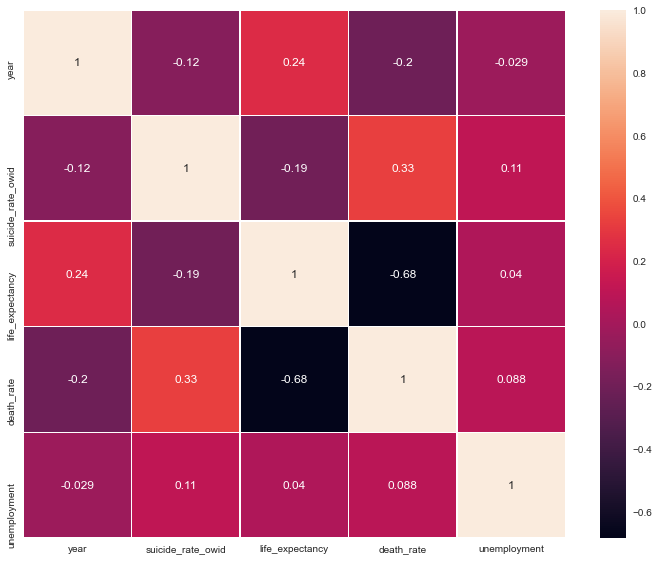

In [20]:
index_df = indicator_correlation[(indicator_correlation["suicide_rate_owid"] >= target_cc_value) | (indicator_correlation["suicide_rate_owid"] <= (-1 * target_cc_value))].index
df_target=indicator_correlation.loc[index_df,index_df]
plt.figure(figsize=(10, 8)) #heatmap size
sns.heatmap(df_target, annot=True, linewidths=.5)
plt.tight_layout()
plt.show()
#Saving our plot
#plt.savefig("static/images/initial_correlation.png", bbox_inches = "tight")

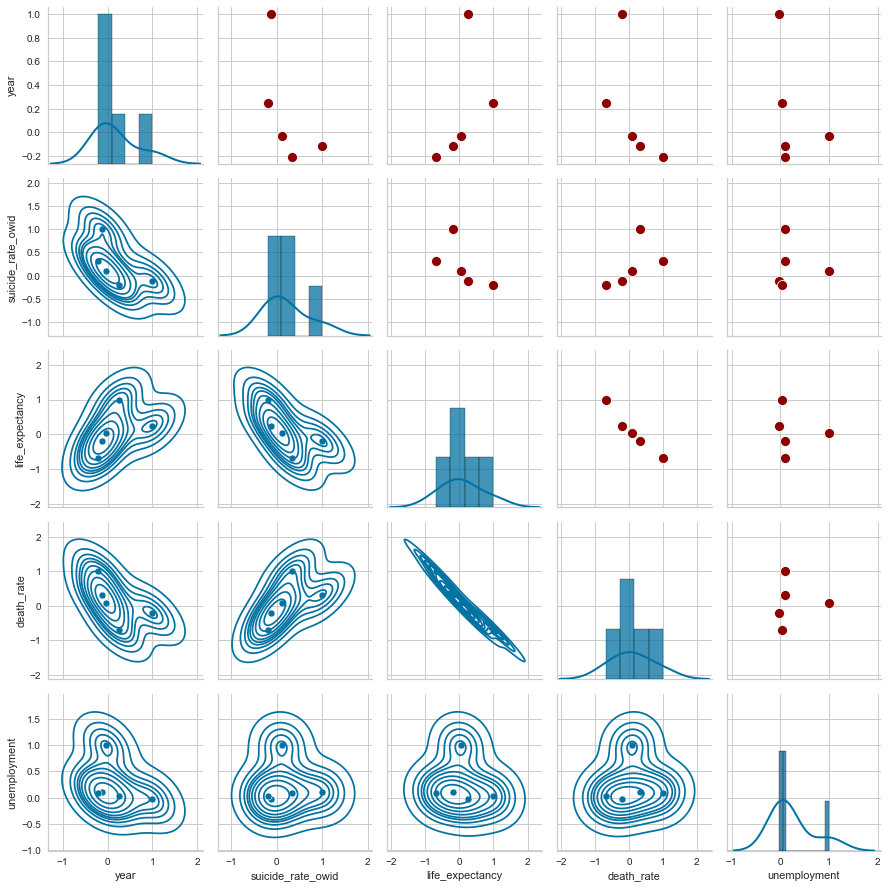

In [21]:
#Scatterplot with our correlations
g = sns.pairplot(df_target)
g.map_upper(sns.scatterplot, s=100,color = 'darkred')
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
plt.tight_layout()
plt.show()
#Saving our scatterplot
#plt.savefig("static/images/correlation_scatter.png", bbox_inches = "tight")

# Linear Regresion

In [45]:
# prepare the data
linear_data=final_indicator.drop("year",axis=1)
df = linear_data.groupby(['country']).mean()
clean_linear=df.dropna().reset_index()
clean_linear.head()

,country,suicide_rate_owid,mental_substance_disorders,life_expectancy,birth_rate,death_rate,gdp,population,unemployment,health_pct
0,Afghanistan,10.305521,17.723631,57.584786,43.810143,10.554429,430.288869,2.429345e+07,11.505556,9.684500
1,Albania,4.910782,10.992244,74.835429,15.916714,6.471893,2378.266708,3.043762e+06,15.842222,5.768362
2,Algeria,4.817725,14.621204,72.075107,23.898929,5.027500,3042.773213,3.295367e+07,18.943333,4.839432
3,Angola,14.557540,12.466010,50.701893,46.952071,15.174750,2328.207207,1.937152e+07,4.922963,2.996013
4,Argentina,11.279611,15.639823,74.124679,19.294393,7.819321,8369.096128,3.829012e+07,11.068148,8.757301


In [46]:
#Selecting our focus feature (columns)
y = clean_linear["suicide_rate_owid"].values
data = clean_linear.drop("country",axis=1).drop("suicide_rate_owid",axis =1).drop("population",axis=1)
X=data.values
x_columns = data.iloc[:,1:].columns
x_columns                                             
                                                

Index(['life_expectancy', 'birth_rate', 'death_rate', 'gdp', 'unemployment',
       'health_pct'],
      dtype='object')

In [47]:
# Creating the Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# Training the Model (Linear regression)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
#Checking the model coefficient
print(model.coef_)

[[ 1.32634669e-01 -6.37541939e-01 -5.12553395e-01  2.59767207e-01
   2.36427123e-05 -1.17774713e-01 -5.21725366e-02]]


In [49]:
#Checking our model intercept
print(model.intercept_)

[64.42891384]


In [50]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.2632947875649929
Testing Score: 0.3465383302060274


In [51]:
# Model Accuracy (also low, flop)
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.347


Text(0.5, 1.0, 'Residual Plot')

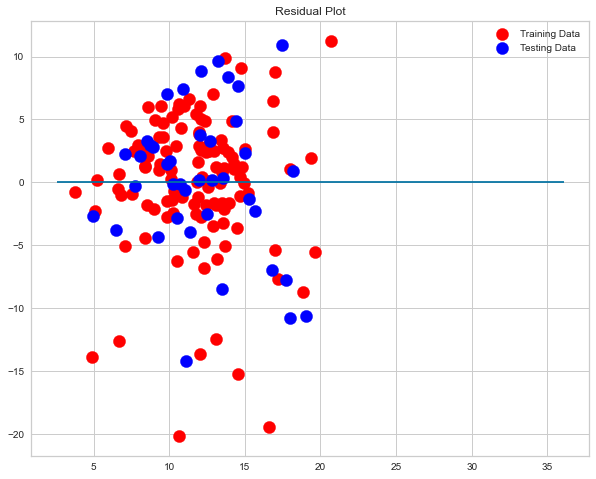

In [30]:
# create a polt on the training and test scores
plt.figure(figsize=(10, 8))
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="red",s=150, label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="blue",s=150, label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
#Saving our residual plot from linear regression
#plt.savefig("static/images/Linear_residualplot.png", bbox_inches = "tight")

In [31]:
#getting predictions
predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
MAE=metrics.mean_absolute_error(y_test, predictions)
print(f"MSE: {MSE}, R2: {r2}, MAE: {MAE}")

MSE: 32.786103939278874, R2: 0.3465383302060274, MAE: 4.404336568973949


In [32]:
# getting importance
importance = model.coef_[0]
# for loop to enumaret importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.13263
Feature: 1, Score: -0.63754
Feature: 2, Score: -0.51255
Feature: 3, Score: 0.25977
Feature: 4, Score: 0.00002
Feature: 5, Score: -0.11777
Feature: 6, Score: -0.05217


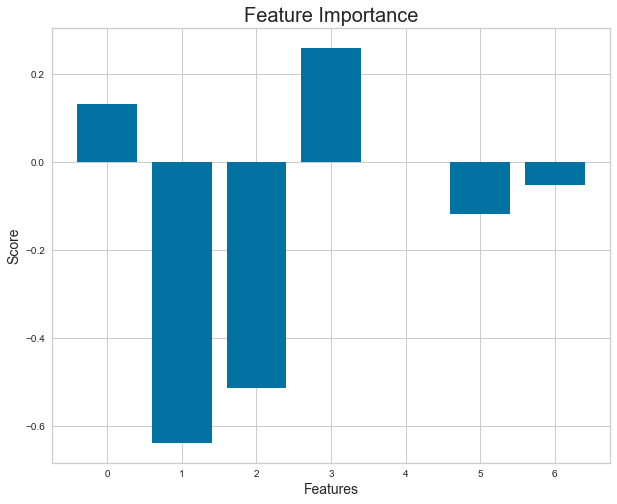

In [33]:
# ploting feature importance
plt.figure(figsize=(10, 8))
pyplot.bar([x for x in range(len(importance))], importance)
# Plot the data 
plt.xlabel("Features",fontsize = 14)
plt.ylabel("Score",fontsize = 14)
plt.title("Feature Importance",fontsize = 20)
pyplot.show()
#Saving our feature importance
#plt.savefig("images/linear_reg_featureimp.png", bbox_inches = "tight")

# SVR Regression

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [68]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [69]:
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: -0.020347072483957396
Testing Score: -0.05749758064386601


In [71]:
y_pred=regressor.predict(X_test)

In [72]:
predictions = regressor.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = regressor.score(X_test, y_test)
MAE=metrics.mean_absolute_error(y_test, predictions)
print(f"MSE: {MSE}, R2: {r2}, MAE: {MAE}")

MSE: 52.8795493695319, R2: -0.05749758064386601, MAE: 5.70100270585987


In [73]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.610


# Logistic Regression

We used as dependent variable ("suicide_rate_owid_, in two groups for the mean (high and low) established the base mean value as (12.11). Any suicide rate  above that value would be considered "high" and below that value would be considered "low"

In [138]:
data = clean_linear.drop("country",axis=1).drop("suicide_rate_owid",axis =1).drop("population",axis=1)
X=data.values
x_columns = data.iloc[:,1:].columns
x_columns
y = clean_linear["suicide_rate_owid"]
def score(i):
    if i < 12.11: return "Low"
    if i > 12.11: return "High"
li = map(lambda x: "{1}".format(x, score(x)), y)
y2=[]
for i in li:
    y2.append(i)

Text(0.5, 1.0, 'mental_substance_disorders\n suicide_rate_owid rate')

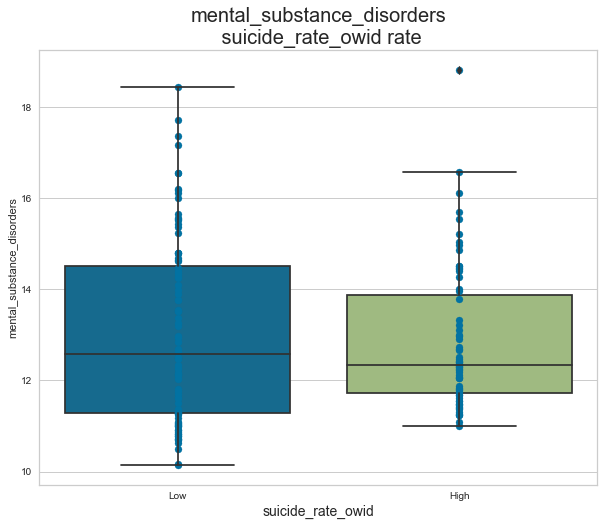

In [139]:
plt.figure(figsize=(10, 8))
sns.boxplot(y2,clean_linear['mental_substance_disorders'])
plt.scatter(y2,clean_linear['mental_substance_disorders'])
plt.xlabel("suicide_rate_owid",fontsize = 14)
plt.title("mental_substance_disorders\n suicide_rate_owid rate",fontsize = 20)
#Saving our visualization
#plt.savefig("static/images/Mentalsub_SuicideRate.png", bbox_inches = "tight")

Text(0.5, 1.0, 'Unemployment\n suicide_rate_owid rate')

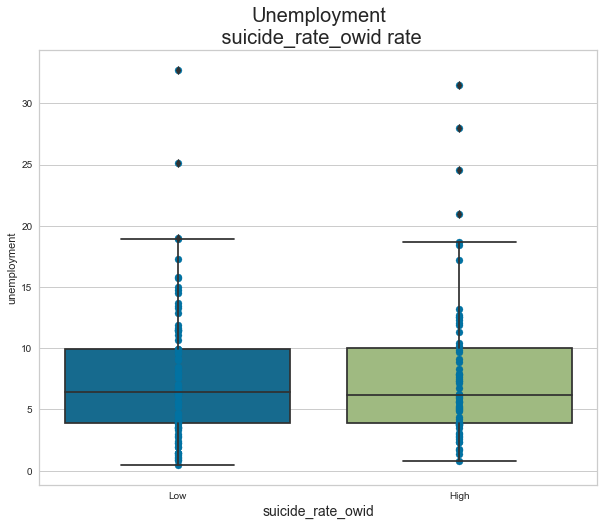

In [141]:
plt.figure(figsize=(10, 8))
sns.boxplot(y2,clean_linear['unemployment'])
plt.scatter(y2,clean_linear['unemployment'])
plt.xlabel("suicide_rate_owid",fontsize = 14)
plt.title("Unemployment\n suicide_rate_owid rate",fontsize = 20)
#Saving our viz
#plt.savefig("static/images/Unemployment_SuicideRate.png", bbox_inches = "tight")

In [142]:
norm=pd.get_dummies(y2, drop_first = False)
norm_y=norm["High"]
norm_y=pd.DataFrame(norm_y)

In [143]:
norm_y.head()

,High
0,0
1,0
2,0
3,1
4,0


In [144]:

X_train, X_test, y_train, y_test = train_test_split(X, norm_y, random_state=42, test_size = 0.3)

In [145]:
model = LogisticRegression()

In [146]:
model.fit(X_train, y_train)

LogisticRegression()

In [147]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.6486486486486487
Testing Data Score: 0.7708333333333334


In [148]:
predictions = model.predict(X_test)

In [149]:
### Accuracy
accuracy = accuracy_score(y_test, predictions)
### Recall
recall = recall_score(y_test, predictions)
### Precision
precision = precision_score(y_test, predictions)
### F1
f1 = f1_score(y_test, predictions)

print('Accuracy：{0:.2f}%'.format(accuracy * 100))
print('Recall：{0:.2f}%'.format(recall * 100))
print('Precision：{0:.2f}%'.format(precision * 100))
print('F1：{0:.2f}%'.format(f1 * 100))

Accuracy：77.08%
Recall：63.16%
Precision：75.00%
F1：68.57%


In [150]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.75      0.63      0.69        19

    accuracy                           0.77        48
   macro avg       0.77      0.75      0.75        48
weighted avg       0.77      0.77      0.77        48



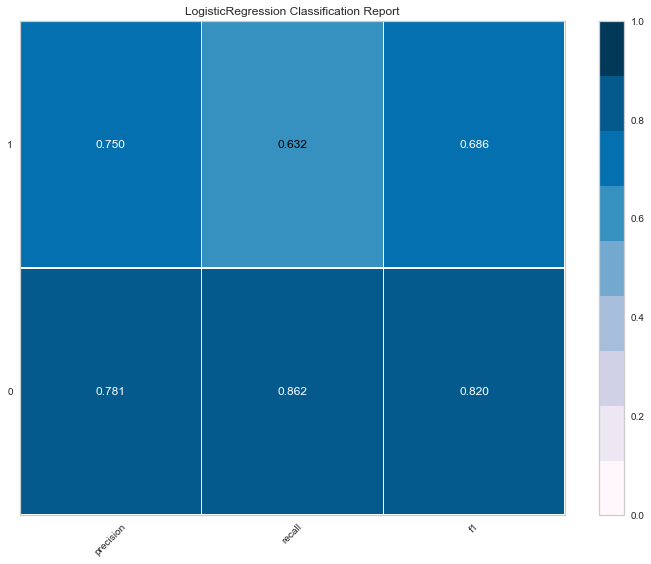

In [152]:
plt.figure(figsize=(10,8))
viz = ClassificationReport(LogisticRegression(),cmap="PuBu")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()
#Saving our visualization
#viz.show(outpath="static/images/logistic_noclassifier.png")

Feature: 0, Score: 0.01277
Feature: 1, Score: -0.01958
Feature: 2, Score: -0.05078
Feature: 3, Score: 0.26700
Feature: 4, Score: -0.00002
Feature: 5, Score: -0.05439
Feature: 6, Score: 0.04079


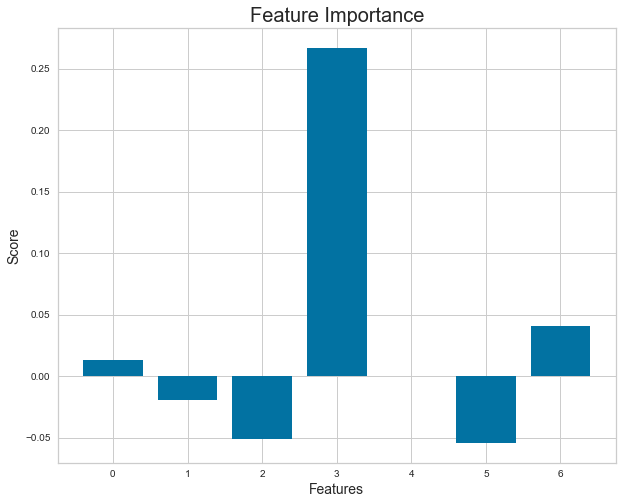

In [153]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10, 8))
pyplot.bar([x for x in range(len(importance))], importance)
plt.xlabel("Features",fontsize = 14)
plt.ylabel("Score",fontsize = 14)
plt.title("Feature Importance",fontsize = 20)
pyplot.show()
#Saving our feature importance
#plt.savefig("static/images/log_featureimportance.png", bbox_inches = "tight")

In [154]:
param_grid = {'C': [1, 5, 10],
              'penalty': ["l1", "l2"]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [155]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ................................C=1, penalty=l1; total time=   0.0s
[CV 2/5] END ................................C=1, penalty=l1; total time=   0.0s
[CV 3/5] END ................................C=1, penalty=l1; total time=   0.0s
[CV 4/5] END ................................C=1, penalty=l1; total time=   0.0s
[CV 5/5] END ................................C=1, penalty=l1; total time=   0.0s
[CV 1/5] END ................................C=1, penalty=l2; total time=   0.0s
[CV 2/5] END ................................C=1, penalty=l2; total time=   0.0s
[CV 3/5] END ................................C=1, penalty=l2; total time=   0.0s
[CV 4/5] END ................................C=1, penalty=l2; total time=   0.0s
[CV 5/5] END ................................C=1, penalty=l2; total time=   0.0s
[CV 1/5] END ................................C=5, penalty=l1; total time=   0.0s
[CV 2/5] END ................................C=5,

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']}, verbose=3)

In [156]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 5, 'penalty': 'l2'}
0.6213438735177865


In [157]:
# Training score:
grid.score(X_train, y_train)

0.6756756756756757

In [158]:
# Testing score:
grid.score(X_test, y_test)

0.75

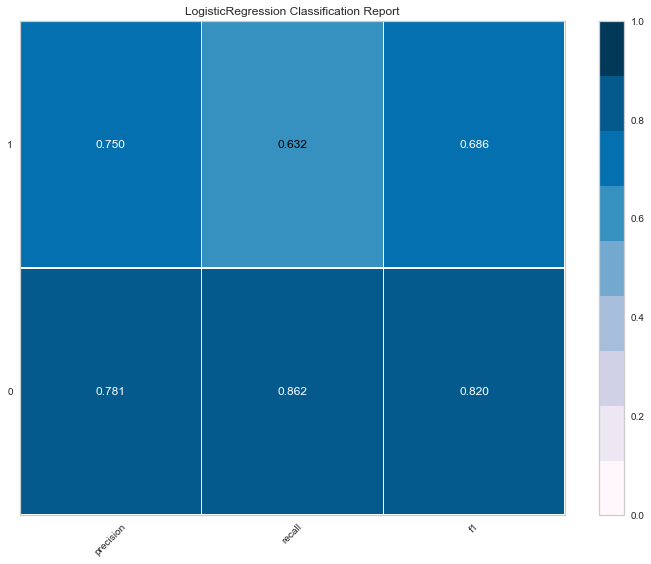

In [159]:
plt.figure(figsize=(10, 8))
viz = ClassificationReport(LogisticRegression(),cmap="PuBu")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()
#Saving the viz
#viz.show(outpath="static/images/log_classifier.png")

In [160]:
#Generating our train and test
X_train, X_test, y_train, y_test = train_test_split(X, norm_y, random_state=42, test_size = 0.3)

# Random Forest 

In [161]:
#Scalling the data
X_scaler = MinMaxScaler().fit(X_train)

X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

In [162]:
#Defining our classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [163]:
#Getting our training and test score
print(f"Training Data Score: {randomforest.score(X_train, y_train)}")
print(f"Testing Data Score: {randomforest.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.7916666666666666


In [165]:
#Setting our feature importance
sorted(zip(randomforest.feature_importances_, x_columns), reverse=True)

[(0.2045963850224719, 'gdp'),
 (0.16095658612625272, 'life_expectancy'),
 (0.14246810837719556, 'death_rate'),
 (0.1311403560772593, 'unemployment'),
 (0.12793860869266718, 'birth_rate'),
 (0.11572641502473131, 'health_pct')]

In [166]:
#Defining the grid fit
param_grid = {'n_estimators': [250, 300, 350],
              'max_depth': [125, 150, 175]}
grid = GridSearchCV(randomforest, param_grid, verbose=3)

In [167]:
#Starting our grid fit
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ................max_depth=125, n_estimators=250; total time=   0.5s
[CV 2/5] END ................max_depth=125, n_estimators=250; total time=   0.7s
[CV 3/5] END ................max_depth=125, n_estimators=250; total time=   0.6s
[CV 4/5] END ................max_depth=125, n_estimators=250; total time=   0.4s
[CV 5/5] END ................max_depth=125, n_estimators=250; total time=   0.6s
[CV 1/5] END ................max_depth=125, n_estimators=300; total time=   0.5s
[CV 2/5] END ................max_depth=125, n_estimators=300; total time=   0.6s
[CV 3/5] END ................max_depth=125, n_estimators=300; total time=   0.5s
[CV 4/5] END ................max_depth=125, n_estimators=300; total time=   0.7s
[CV 5/5] END ................max_depth=125, n_estimators=300; total time=   0.6s
[CV 1/5] END ................max_depth=125, n_estimators=350; total time=   0.8s
[CV 2/5] END ................max_depth=125, n_est

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [125, 150, 175],
                         'n_estimators': [250, 300, 350]},
             verbose=3)

In [168]:
# Making the predictions
predictions = grid.predict(X_test)

In [169]:
#making the clasification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.72      0.68      0.70        19

    accuracy                           0.77        48
   macro avg       0.76      0.76      0.76        48
weighted avg       0.77      0.77      0.77        48



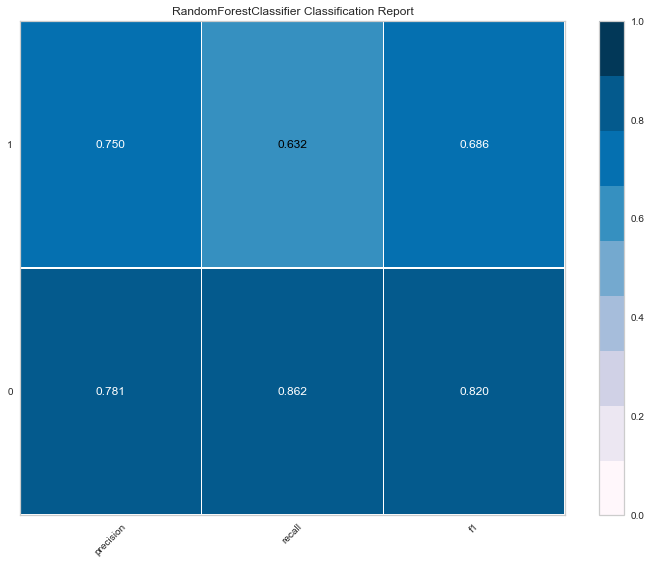

In [170]:
#Plotting our classification report
plt.figure(figsize=(10, 8))
viz = ClassificationReport(RandomForestClassifier(),cmap="PuBu")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()
#Saving the viz
#viz.show(outpath="static/images/randomf_classifier.png")

FeatureImportances(ax=<AxesSubplot:>, estimator=RandomForestClassifier())

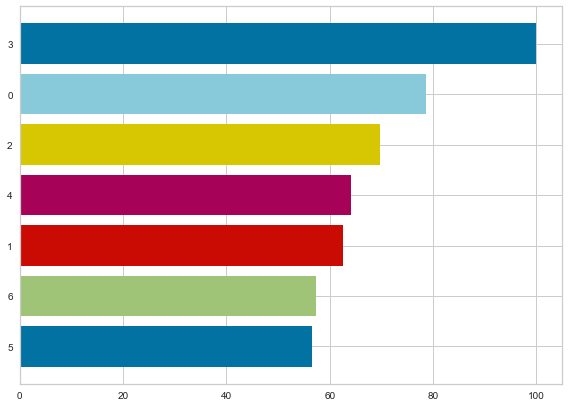

In [172]:
#Plotting our feature importance report
plt.figure(figsize=(10, 8))
viz = FeatureImportances(randomforest,size=(700, 500),color='b', align='center')
viz.fit(X_train, y_train)
#Saving the viz
#viz.show(outpath="static/images/randomf_featureimportance.png")

# SVM

In [200]:
#Setting our train, test, and split
X_train, X_test, y_train, y_test = train_test_split(X, norm_y, random_state=42, test_size = 0.3)

In [201]:
#Scalling our data
X_minmax = MinMaxScaler().fit(X_train)
X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

In [202]:
#Defining model and fit
model = SVC(kernel='linear')
model.fit(X_train_minmax, y_train)

SVC(kernel='linear')

In [203]:
#Setting Training and Test Score
print(f"Training Data Score: {model.score(X_train_minmax, y_train)}")
print(f"Testing Data Score: {model.score(X_test_minmax, y_test)}")

Training Data Score: 0.6846846846846847
Testing Data Score: 0.7708333333333334


In [205]:
#Defining Grid
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [206]:
#Making grid fit for all fits
grid.fit(X_train_minmax, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 2/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 3/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 4/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 5/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 1/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 2/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 3/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 4/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 5/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 1/5] END ...............................C=1, gamma=0.001; total time=   0.0s
[CV 2/5] END ...............................C=1,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [207]:
#Printing best parameters and score
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001}
0.675494071146245


In [208]:
# Training score:
grid.score(X_train_minmax, y_train)

0.6846846846846847

In [209]:
# Testing score:
grid.score(X_test_minmax, y_test)

0.7708333333333334

In [210]:
# Setting predictions
predictions = model.predict(X_test_minmax)

In [211]:
# Accuracy
accuracy = accuracy_score(y_test, predictions)
# Recall
recall = recall_score(y_test, predictions)
# Precision
precision = precision_score(y_test, predictions)
# F1
f1 = f1_score(y_test, predictions)

print('Accuracy：{0:.2f}%'.format(accuracy * 100))
print('Recall：{0:.2f}%'.format(recall * 100))
print('Precision：{0:.2f}%'.format(precision * 100))
print('F1：{0:.2f}%'.format(f1 * 100))

Accuracy：77.08%
Recall：57.89%
Precision：78.57%
F1：66.67%


In [212]:
#Printing the Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.79      0.58      0.67        19

    accuracy                           0.77        48
   macro avg       0.78      0.74      0.75        48
weighted avg       0.77      0.77      0.76        48



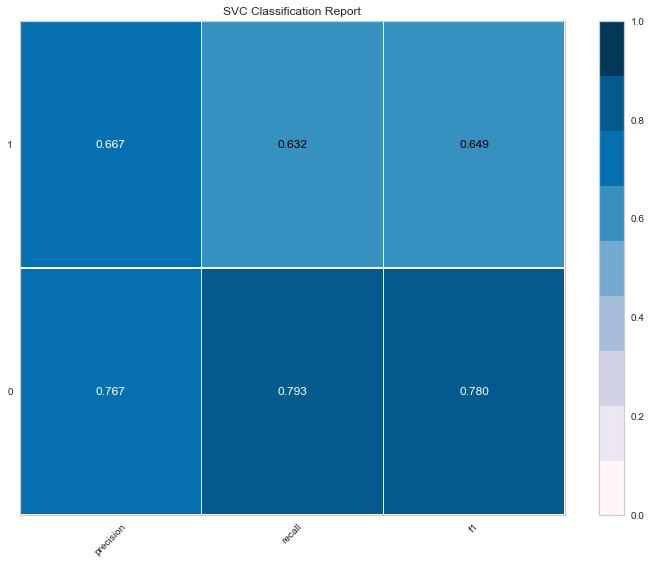

In [213]:
#Classification Viz
plt.figure(figsize=(10, 8))
viz = ClassificationReport(SVC(),cmap="PuBu")
viz.fit(X_train_minmax, y_train)
viz.score(X_test_minmax, y_test)
viz.finalize()
#Saving our viz
#viz.show(outpath="static/images/svm_classifier.png")

FeatureImportances(ax=<AxesSubplot:>, estimator=SVC(kernel='linear'))

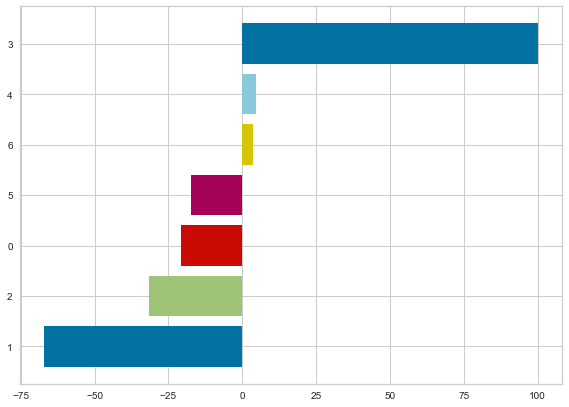

In [214]:
#Feature Importance Viz
plt.figure(figsize=(10, 8))
viz = FeatureImportances(model,size=(700, 500),color='b', align='center')
viz.fit(X_train_minmax, y_train)
#Saving our viz
#viz.show(outpath="static/images/svm_featureimportance.png")

# Neural Network

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, norm_y, random_state=42, test_size = 0.3)

In [190]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [191]:
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [192]:
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)
print(label_encoder.classes_)

[0 1]


In [193]:
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
pd.plotting.scatter_matrix(X, c=encoded_y, figsize=(40, 40));
#Saving our viz
#plt.savefig('image_models/neuralnetwork.png')

AttributeError: 'numpy.ndarray' object has no attribute '_get_numeric_data'

In [194]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=40))
model.add(Dense(units=3, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                410       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 443
Trainable params: 443
Non-trainable params: 0
_________________________________________________________________


In [195]:
#Model compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [196]:
#Model fitting into training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100


ValueError: in user code:

    C:\Users\saman\anaconda3\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\saman\anaconda3\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\saman\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\saman\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\saman\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\saman\anaconda3\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\saman\anaconda3\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\saman\anaconda3\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\saman\anaconda3\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 40 but received input with shape (None, 7)


In [197]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

ValueError: in user code:

    C:\Users\saman\anaconda3\lib\site-packages\keras\engine\training.py:1330 test_function  *
        return step_function(self, iterator)
    C:\Users\saman\anaconda3\lib\site-packages\keras\engine\training.py:1320 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\saman\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\saman\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\saman\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\saman\anaconda3\lib\site-packages\keras\engine\training.py:1313 run_step  **
        outputs = model.test_step(data)
    C:\Users\saman\anaconda3\lib\site-packages\keras\engine\training.py:1267 test_step
        y_pred = self(x, training=False)
    C:\Users\saman\anaconda3\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\saman\anaconda3\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 40 but received input with shape (None, 7)


# Model Comparison

RF: 0.679583 (0.115882)
LR: 0.667500 (0.132900)
SVM: 0.578333 (0.131956)


<Figure size 720x576 with 0 Axes>

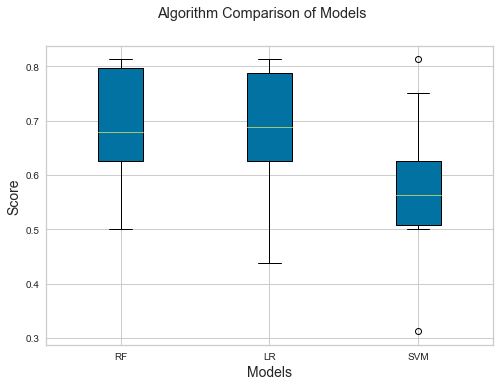

In [215]:
seed=7
#Defining our models (classifiers)
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
#Evaluating model (for loop)
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, y2, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
#Boxplot visualization
plt.figure(figsize=(10, 8))
fig = plt.figure()
fig.suptitle('Algorithm Comparison of Models')
ax = fig.add_subplot(111)
plt.boxplot(results,patch_artist=True)
ax.set_xticklabels(names)
plt.xlabel("Models",fontsize = 14)
plt.ylabel("Score",fontsize = 14)
plt.show()
#Saving our algorith comparison
#plt.savefig("static/images/comparison_models.png", bbox_inches = "tight")

# Final Thoughts

For this project, we decided to analyze suicide rate through a series of factores related to: demographic, economics, geographical and social. 

Our intention was to be able to predict a person who is more likely to go through suicide mortality if they have these factors in their life. We used data from various resources such as world bank, our world in data, kaggle, and WHO. The data was then cleaned through python to be able to merge all the databases together and having uniformity, as well as normalization between all variables. 

We then processed the data through machine learning using models such as : linear regression, logistic regression, random forest, and support vector machine. Of course, there were differences in accuracy because not all models are fit for this kind of purpose: prediction. Some are general models to note relationship between data and other factors such as the data not being fit for the type of model caused faults in accuracy.
        
Beyond logical reasoning, we also found research that sustaining economical factors such as unemployment, had a strong influence on the suicide mortality rate. Other factors we noticed with a strong relation was mental_substance_abuse and of course death_rate. We hope that with this research, awareness can be raised so additional funding is done in welfare-state policies that may reduce the suicide rate mortality. 

An initial correlation was made in which we discovered the following: 

**Positive correlation**
suicide_rate_owid    1.000000
death_rate           0.325633
unemployment         0.105979

**Negative correlation**
year              -0.116670
life_expectancy   -0.194228

Of course, these correlations were to be expected, nevertheless we are a little dissapointed that they are lower than 0.4, which means they are not high enough to prove a strong relationship. 

We then executed a linear model, in which we found low testing and training scores, as well as accuracy. This is because linear regressions are used for predictions (of two variables but not categorical ones), in which a logistical regression is the better fit. We also did a logistical regression in which it gaves us an accuracy of 77% for the model. We also plotted the relationship of unemployment vs suicide rate, and mental_abuse_substance vs suicide rate in scatter plots. The next model we did was a random forest, in which we also got an accuracy of 77% but we got higher precisions and recall than the logistical model. 

Other models we tested were the SVR and SVM. In the SVR we got negative test scores which means are prediction is not that great and the parameters were not a fit for the data. It is focused on continous values to know how tolerant we are of errors, while SVM is focused on classification values (like the ones we employed). In the SVM we got good testing and training scores as well as an accuracy of 77.08% and precision of 78.57%.

In conclusion, SVM, Random Forest, and the Logistical Regression were the best fit for our data and our prediction (focus of study). We believe that this is an important cause that has increased during externalities  such as the pandemic we are currently going through. Even though this is a difficult subject to bring forward (even when it comes to public policy), it is in our best interest that the awareness raised allows those found in this situation(and with the factors analyzed) to receive help.  
